In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [7]:
path='/Users/thanhtainguyen/Desktop/sale_and_inv/InventoryAndSale_snapshot_data/Inventory_snapshot_data/Inventory_2022.xlsx'

Get all the shits

In [8]:
inventory=pd.ExcelFile(path)
inventories=inventory.sheet_names
print(inventories)

['31-01', '28-02', '31-03', '30-04', '31-05', '30-06', '31-07', '31-08', '30-09', '31-10', '30-11', '31-12', 'Sheet1']


In [9]:
listings=[]
for exchange in inventories:
    listing = pd.read_excel(inventory, sheet_name=exchange, na_values='n/a')
    listing['Exchange'] = exchange
    listings.append(listing)
# Concatenate the listings: listing_data
listing_data = pd.concat(listings)

# Inspect the results
listing_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1367080 entries, 0 to 50109
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Unnamed: 0          1367080 non-null  float64
 1   index               1367080 non-null  float64
 2   plant               1367080 non-null  float64
 3   calendar_year       1367080 non-null  float64
 4   calendar_yeer_week  1367080 non-null  float64
 5   sloc                1367080 non-null  object 
 6   quantity            1367080 non-null  float64
 7   total_amount        1367080 non-null  float64
 8   product_id          1367080 non-null  object 
 9   Exchange            1367080 non-null  object 
dtypes: float64(7), object(3)
memory usage: 114.7+ MB


In [10]:
train_inv_set , test_inv_set = train_test_split(listing_data,test_size=0.4,random_state=42)

In [11]:
train_inv_set.columns

Index(['Unnamed: 0', 'index', 'plant', 'calendar_year', 'calendar_yeer_week',
       'sloc', 'quantity', 'total_amount', 'product_id', 'Exchange'],
      dtype='object')

In [12]:
train_inv_set.drop(['Unnamed: 0','index'],axis=1,inplace=True)
train_inv_set.head()

,plant,calendar_year,calendar_yeer_week,sloc,quantity,total_amount,product_id,Exchange
158417,1239.0,2022.0,20220531.0,3000,1.0,0.0,25264dfacde645c58c2060c125172ff1VAG36,31-05
30161,1204.0,2022.0,20220331.0,3000,2.0,0.0,e9fe5e4fa1804678838b79fc252cbe52DOO29,31-03
30206,1204.0,2022.0,20221231.0,3000,4.0,0.0,7d02ace5174245faad535b64a4025602XAM43,31-12
42415,1209.0,2022.0,20221130.0,3000,1.0,0.0,3d884f7c01b04e069cdddd1b82692985HOG31,30-11
19732,1204.0,2022.0,20220531.0,3000,1.0,0.0,71541ad5119a473da1c6040c998b2103XNH39,31-05


In [13]:
train_inv_set[['quantity','total_amount']].describe()

,quantity,total_amount
count,820248.000000,8.202480e+05
mean,1.647502,5.939344e+04
std,2.076158,5.186968e+05
min,0.000000,-2.689808e+07
25%,1.000000,0.000000e+00
50%,1.000000,0.000000e+00
75%,2.000000,0.000000e+00
max,193.000000,5.198730e+07


In [14]:
train_inv_set['calendar_yeer_week']=pd.to_datetime(train_inv_set['calendar_yeer_week'],format='%Y%m%d')
train_inv_set.head()

,plant,calendar_year,calendar_yeer_week,sloc,quantity,total_amount,product_id,Exchange
158417,1239.0,2022.0,2022-05-31,3000,1.0,0.0,25264dfacde645c58c2060c125172ff1VAG36,31-05
30161,1204.0,2022.0,2022-03-31,3000,2.0,0.0,e9fe5e4fa1804678838b79fc252cbe52DOO29,31-03
30206,1204.0,2022.0,2022-12-31,3000,4.0,0.0,7d02ace5174245faad535b64a4025602XAM43,31-12
42415,1209.0,2022.0,2022-11-30,3000,1.0,0.0,3d884f7c01b04e069cdddd1b82692985HOG31,30-11
19732,1204.0,2022.0,2022-05-31,3000,1.0,0.0,71541ad5119a473da1c6040c998b2103XNH39,31-05


#### the sloc column cotains 2 data types is string and integer so must convert it into 1 type 
#### also we must fullfill the data because it has # ,by using imputer

In [15]:
train_inv_set['sloc'].value_counts()

3000    543013
3000    262354
#        14309
9999       281
9999       277
3007        10
3007         4
Name: sloc, dtype: int64

In [16]:
imputer=SimpleImputer(missing_values = np.nan,strategy="most_frequent")

In [17]:
train_inv_set['sloc']=train_inv_set['sloc'].replace({"#": np.nan})
train_inv_set['sloc']=imputer.fit_transform(train_inv_set[['sloc']]).ravel()
train_inv_set['sloc']=train_inv_set['sloc'].apply(int)
train_inv_set['sloc'].unique()
train_inv_set['sloc'].value_counts()

3000    819676
9999       558
3007        14
Name: sloc, dtype: int64

In [18]:
feature=['plant','calendar_year','sloc']
def convert(df,columns):
    for column in columns :
        df[column]=df[column].astype('category')
convert(train_inv_set,feature)
train_inv_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 820248 entries, 158417 to 51048
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   plant               820248 non-null  category      
 1   calendar_year       820248 non-null  category      
 2   calendar_yeer_week  820248 non-null  datetime64[ns]
 3   sloc                820248 non-null  category      
 4   quantity            820248 non-null  float64       
 5   total_amount        820248 non-null  float64       
 6   product_id          820248 non-null  object        
 7   Exchange            820248 non-null  object        
dtypes: category(3), datetime64[ns](1), float64(2), object(2)
memory usage: 39.9+ MB


In [19]:
train_inv_set['total_amount'].isna().sum()

0

#### total_amount is fullfill

In [20]:
print(len(train_inv_set['product_id'].unique()))

25677


#### there are 25677 products in the train data inventory set

In [21]:
print("there are %.0f products in the inventory" % train_inv_set['quantity'].sum())
print("these cost %.0f VND" % train_inv_set['total_amount'].sum())

there are 1351360 products in the inventory
these cost 48717352894 VND


In [22]:
check_negative=train_inv_set[train_inv_set['quantity']<0]
print(check_negative.sum(numeric_only=True))

quantity        0.0
total_amount    0.0
dtype: float64


### there are no negative in stock value

In [23]:
train_inv_set.sort_values(by='calendar_yeer_week',ascending=True,inplace=True)
train_inv_set.head()

,plant,calendar_year,calendar_yeer_week,sloc,quantity,total_amount,product_id,Exchange
13659,1202.0,2022.0,2022-01-31,3000,1.0,0.0,7ae5884353114beb95178b2162659558HOG30,31-01
7311,1201.0,2022.0,2022-01-31,3000,2.0,0.0,475db8befa6244968f0519b5d81a1863NAD40,31-01
49855,1207.0,2022.0,2022-01-31,3000,2.0,0.0,38f7f4c8951a486594eca15177cd55d7NAU41,31-01
66164,1209.0,2022.0,2022-01-31,3000,1.0,0.0,34b8b25112424492aa99a0cacc53ac9fDEN25,31-01
15381,1202.0,2022.0,2022-01-31,3000,1.0,0.0,86cb80b6507c48f099b7b10f0a148c17DOO28,31-01


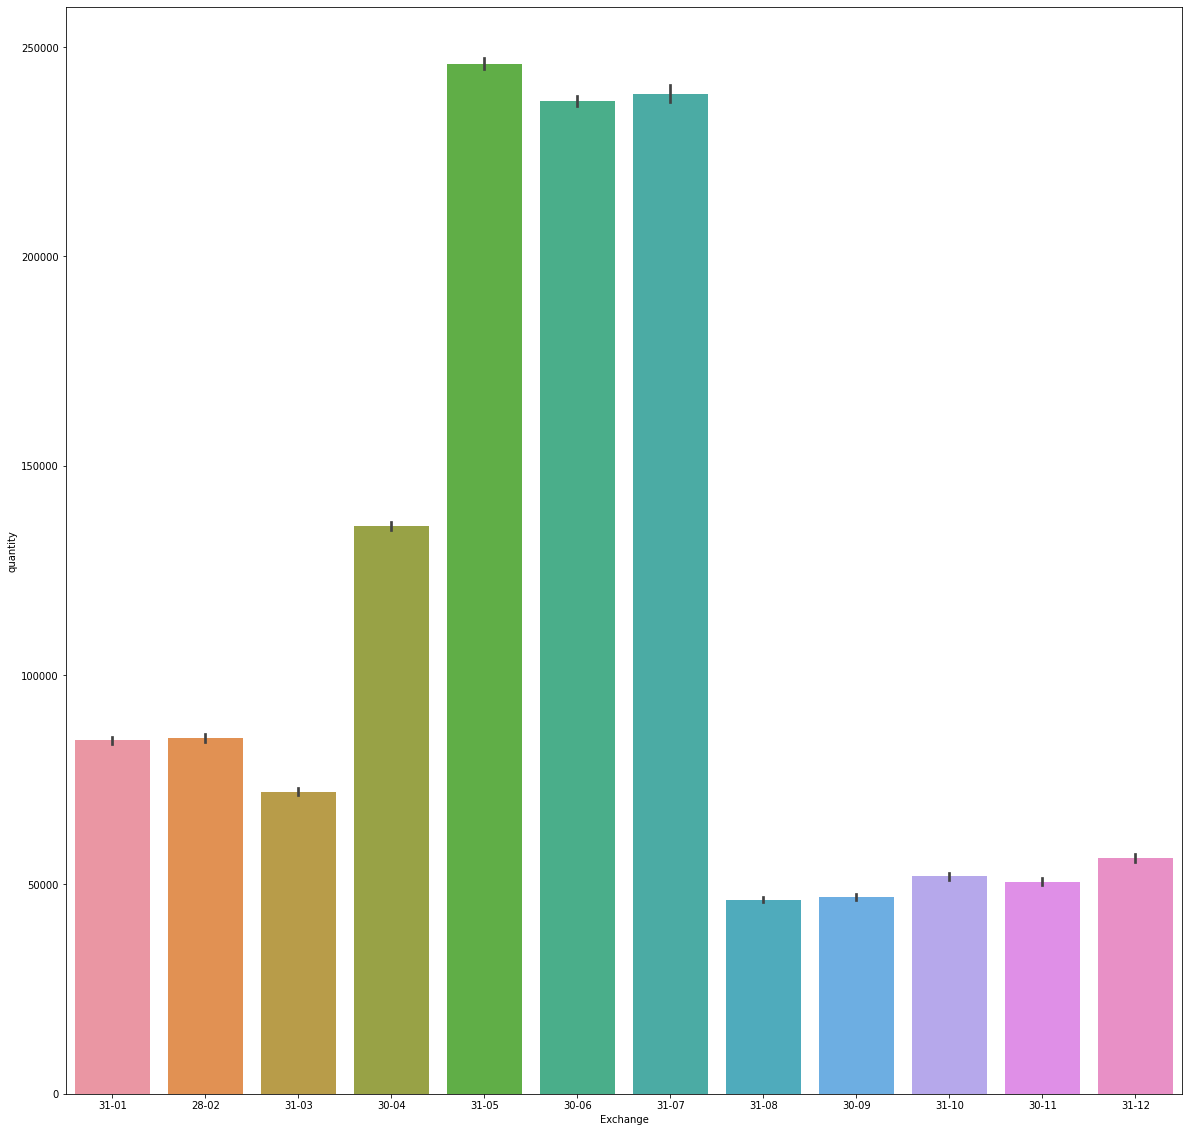

In [24]:
plt.figure(figsize=(20,20))
sns.barplot(data=train_inv_set,x='Exchange',y='quantity',estimator=sum)
plt.show()

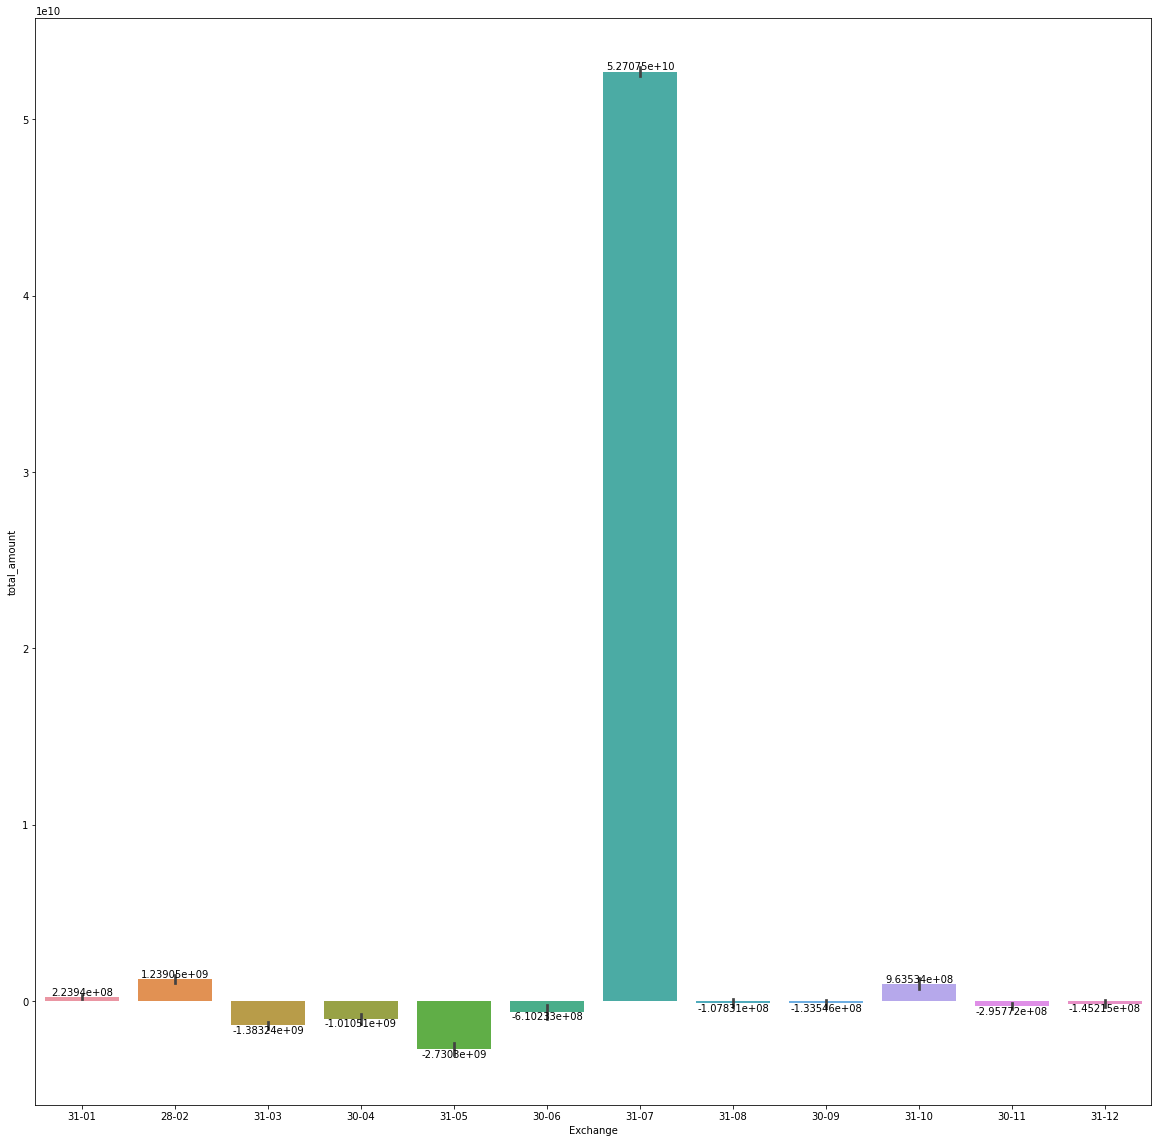

In [25]:
plt.figure(figsize=(20,20))
ax=sns.barplot(data=train_inv_set,x='Exchange',y='total_amount',estimator=sum)
ax.bar_label(ax.containers[0], fontsize=10);